## Importing Libraries

In [33]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
from datetime import datetime
import geopandas
from sklearn.impute import SimpleImputer


## Getting to know the Data


### Description of the Provided CSV Files

- **ticket_data.csv**:
  Contains a ticket history where each row represents a ticket proposal on tictactrip.

- **cities.csv**:
  Contains information about cities served by tictactrip. Links can be established through the columns 'o_city' (origin_city) and 'd_city' (destination_city) in the ticket_data.

- **stations.csv**:
  Includes data about stations served by tictactrip. Links can be established through the columns 'o_station' and 'd_station' in the ticket_data.

- **providers.csv**:
  Provides information about different providers. Relationships can be made via the 'company' column in ticket_data. A provider refers to a subsidiary company. For instance, TGV and TER are two providers under VSC (voyages-sncf).

The provided information outlines the content and relationships between the datasets. These relationships are established through specific columns across the datasets, facilitating data linkage and analysis within the context of tictactrip services.


In [34]:
cities = pd.read_csv("Data\\cities.csv")
providers = pd.read_csv("Data\\providers.csv")
stations = pd.read_csv("Data\\stations.csv")
ticket = pd.read_csv("Data\\ticket_data.csv")

In [35]:
dataframes = [("cities", cities), ("providers", providers), ("stations", stations), ("ticket", ticket)]

for df_name, df in dataframes:

    print(f"Columns of {df_name} \n{df.columns.tolist()}\n")

Columns of cities 
['id', 'local_name', 'unique_name', 'latitude', 'longitude', 'population']

Columns of providers 
['id', 'company_id', 'provider_id', 'name', 'fullname', 'has_wifi', 'has_plug', 'has_adjustable_seats', 'has_bicycle', 'transport_type']

Columns of stations 
['id', 'unique_name', 'latitude', 'longitude']

Columns of ticket 
['id', 'company', 'o_station', 'd_station', 'departure_ts', 'arrival_ts', 'price_in_cents', 'search_ts', 'middle_stations', 'other_companies', 'o_city', 'd_city']



## Renaming Columns in Datasets for Enhanced Clarity and Manageability

In this section, columns within multiple datasets have been renamed utilizing Pandas functionality. The objective behind this action is to enhance the clarity and manageability of the datasets by assigning more explicit and descriptive column names.

Below is the Python code snippet showcasing the column renaming process:

## Exploring the Datasets

### Overview and Statistical Summary

The following code snippets offer insights into the datasets, providing a comprehensive understanding of its structure, statistical characteristics, and missing values.

In [36]:


cities.drop(['local_name'], axis=1, inplace=True)
cities.rename(columns={'id':'city_id',
                            'unique_name':'city_name',
                            'latitude':'city_latitude',
                            'longitude':'city_longitude',
                            'population':'city_population'}, inplace=True)


providers.rename(columns={'id':'true_company_id',
                               'name':'company_name',
                               'fullname':'company_fullname'}, inplace=True)

stations.rename(columns={'id':'station_id',
                              'unique_name' : 'station_name',
                              'latitude':'station_latitude',
                              'longitude':'station_longitude'}, inplace=True)


ticket.rename(columns={'id':'ticket_id'}, inplace=True)

     

In [37]:
dataframes = [("cities", cities), ("providers", providers), ("stations", stations), ("ticket", ticket)]

for df_name, df in dataframes:

    print(f"Columns of {df_name} \n{df.columns.tolist()}\n")

Columns of cities 
['city_id', 'city_name', 'city_latitude', 'city_longitude', 'city_population']

Columns of providers 
['true_company_id', 'company_id', 'provider_id', 'company_name', 'company_fullname', 'has_wifi', 'has_plug', 'has_adjustable_seats', 'has_bicycle', 'transport_type']

Columns of stations 
['station_id', 'station_name', 'station_latitude', 'station_longitude']

Columns of ticket 
['ticket_id', 'company', 'o_station', 'd_station', 'departure_ts', 'arrival_ts', 'price_in_cents', 'search_ts', 'middle_stations', 'other_companies', 'o_city', 'd_city']



### Cities

In [38]:
print(cities.shape)
cities.head()

(8040, 5)


,city_id,city_name,city_latitude,city_longitude,city_population
0,5159,padua,45.406435,11.876761,209678.0
1,76,barcelona,41.385064,2.173404,1611822.0
2,81,basel,47.593437,7.619812,NaN
3,259,erlangen,49.589674,11.011961,105412.0
4,11979,balș,44.353354,24.095672,NaN


In [39]:
cities.describe()

,city_id,city_latitude,city_longitude,city_population
count,8040.000000,8040.000000,8040.000000,3.690000e+02
mean,6328.786816,47.223456,6.299331,3.360184e+05
std,3504.698537,3.700934,7.747070,5.840409e+05
min,1.000000,1.370676,-101.397388,1.000460e+05
25%,2501.500000,44.662402,1.214282,1.253750e+05
50%,7003.500000,47.304750,4.887856,1.803020e+05
75%,9014.250000,49.611998,10.311597,3.098690e+05
max,12192.000000,64.145981,48.731938,8.416535e+06


In [40]:
cities.isnull().sum()

city_id               0
city_name             1
city_latitude         0
city_longitude        0
city_population    7671
dtype: int64

### Providers

In [41]:
print(providers.shape)
providers.head()

(227, 10)


,true_company_id,company_id,provider_id,company_name,company_fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type
0,9,1,NaN,ouibus,Ouibus,True,True,True,False,bus
1,10,2,NaN,deinbus,Deinbus.de,False,False,False,False,bus
2,11,3,NaN,infobus,Infobus,False,False,False,False,bus
3,12,4,NaN,studentAgency,Student Agency,False,False,False,False,bus
4,13,5,NaN,flixbus,Flixbus,True,False,False,False,bus


In [42]:
providers.describe()

,true_company_id,company_id
count,227.000000,227.000000
mean,790.656388,9.343612
std,2251.823950,3.036065
min,9.000000,1.000000
25%,66.500000,9.000000
50%,127.000000,9.000000
75%,183.500000,9.000000
max,8389.000000,40.000000


In [43]:
providers.isnull().sum()

true_company_id          0
company_id               0
provider_id             14
company_name             0
company_fullname         0
has_wifi                 3
has_plug                 3
has_adjustable_seats     3
has_bicycle              3
transport_type           0
dtype: int64

### Stations

In [44]:
print(stations.shape)
stations.head()


(11035, 4)


,station_id,station_name,station_latitude,station_longitude
0,1,Aalen (Stuttgarter Straße),48.835296,10.092956
1,2,Aéroport Bordeaux-Mérignac,44.830226,-0.700883
2,3,Aéroport CDG,49.009900,2.559310
3,4,Aéroport de Berlin-Schönefeld,52.389446,13.520345
4,5,Aéroport de Dresden,51.123604,13.764737


In [45]:
stations.describe()

,station_id,station_latitude,station_longitude
count,11035.000000,11035.000000,11035.000000
mean,5518.026914,47.526678,7.580807
std,3185.719813,3.953972,63.655681
min,1.000000,-22.355790,-22.625538
25%,2759.500000,44.896447,1.358655
50%,5518.000000,47.759670,5.824010
75%,8276.500000,50.349956,12.166133
max,11036.000000,64.137571,6645.000000


In [46]:
stations.isnull().sum()

station_id           0
station_name         0
station_latitude     0
station_longitude    0
dtype: int64

### Tickets

In [47]:
print(ticket.shape)
ticket.head()

(74168, 12)


,ticket_id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542


In [48]:
ticket.describe()

,ticket_id,company,o_station,d_station,price_in_cents,o_city,d_city
count,7.416800e+04,74168.000000,32727.000000,32727.000000,74168.000000,74168.000000,74168.000000
mean,6.832108e+06,7109.565527,2907.132673,2347.858129,4382.711061,849.186105,883.776265
std,2.141060e+04,3005.380792,3347.629180,3090.798007,3739.325367,1485.791782,1654.698575
min,6.795025e+06,9.000000,3.000000,3.000000,300.000000,5.000000,1.000000
25%,6.813567e+06,8376.000000,400.000000,396.000000,1900.000000,485.000000,453.000000
50%,6.832108e+06,8385.000000,701.000000,575.000000,3350.000000,628.000000,562.000000
75%,6.850650e+06,8385.000000,6246.000000,4538.000000,5250.000000,628.000000,628.000000
max,6.869192e+06,8387.000000,11017.000000,11017.000000,38550.000000,12190.000000,12190.000000


In [49]:
ticket.isnull().sum()

ticket_id              0
company                0
o_station          41441
d_station          41441
departure_ts           0
arrival_ts             0
price_in_cents         0
search_ts              0
middle_stations    41441
other_companies    41441
o_city                 0
d_city                 0
dtype: int64

C:\Users\Garaw\AppData\Local\Temp\ipykernel_9428\3645089976.py:15: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


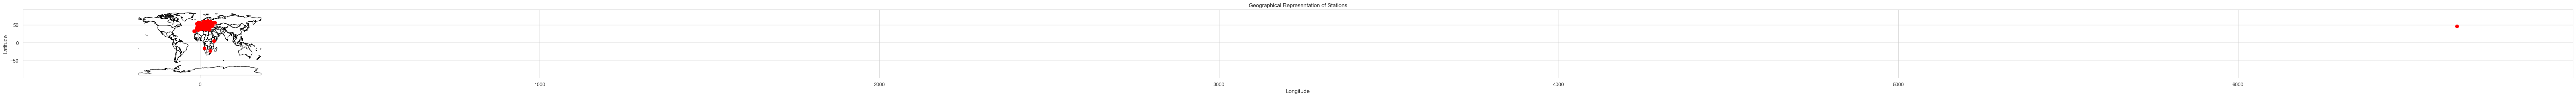

In [118]:
import geopandas as gpd
from shapely.geometry import Point

stations_copy=stations.copy()
cities_copy=cities.copy()
# Merge stations data with city coordinates
stations_with_coords = stations_copy.merge(cities_copy[['city_id', 'city_latitude', 'city_longitude']], 
                                      left_on='station_id', right_on='city_id')

# Create a GeoDataFrame
geometry = [Point(xy) for xy in zip(stations_with_coords['station_longitude'], stations_with_coords['station_latitude'])]
geo_df = gpd.GeoDataFrame(stations_with_coords, crs="EPSG:4326", geometry=geometry)

# Plotting geographical representation of stations
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(100, 100), color='white', edgecolor='black')
geo_df.plot(ax=ax, marker='o', color='red', markersize=50)
plt.title('Geographical Representation of Stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


## Handling Missing Values Using SimpleImputer from Scikit-Learn

In this scenario, the `SimpleImputer` class from Scikit-Learn is employed to replace missing values with the most frequent data found within each column across multiple datasets. This technique helps in ensuring that missing values are substituted with the most commonly occurring values, thus preserving the integrity of the data.

The Python code snippet below demonstrates the application of `SimpleImputer` for each dataset:

In [50]:

my_imputer = SimpleImputer(strategy='most_frequent')

tickets = pd.DataFrame(my_imputer.fit_transform(ticket), columns=ticket.columns)
cities = pd.DataFrame(my_imputer.fit_transform(cities), columns=cities.columns)
stations = pd.DataFrame(my_imputer.fit_transform(stations), columns=stations.columns)
providers = pd.DataFrame(my_imputer.fit_transform(providers), columns=providers.columns)
     

## Data Analysis

###  Calculating the Prices

In [51]:
# Minimum, average, and maximum prices
min_price = ticket['price_in_cents'].min()
max_price = ticket['price_in_cents'].max()
mean_price = ticket['price_in_cents'].mean()

print(f"Price Information:")
print(f"Minimum Price: {min_price} cents --> {min_price/100} euros ")
print(f"Maximum Price: {max_price} cents --> {max_price/100} euros ")
print(f"Average Price: {mean_price:.2f} cents --> {(mean_price/100):.2f} euros \n")

Price Information:
Minimum Price: 300 cents --> 3.0 euros 
Maximum Price: 38550 cents --> 385.5 euros 
Average Price: 4382.71 cents --> 43.83 euros 



In [52]:
# more details in cents : LES PERCENTILES
Q1_25e_percentile=ticket.price_in_cents.describe()['25%']
Median=ticket.price_in_cents.describe()['50%']
Q3_75e_percentile=ticket.price_in_cents.describe()['75%']
print(Q1_25e_percentile/100)
print(Median/100)
print(Q3_75e_percentile/100)

19.0
33.5
52.5


### Adding Duration column to Ticket.csv

In [53]:
# Convert 'departure_ts' and 'arrival_ts' columns to datetime objects
ticket['departure_ts'] = pd.to_datetime(ticket['departure_ts'])
ticket['arrival_ts'] = pd.to_datetime(ticket['arrival_ts'])

# Calculate duration for each trip in seconds
ticket['duration'] = (ticket['arrival_ts'] - ticket['departure_ts']).dt.total_seconds()

# Calculate minimum, maximum, and average duration per trip
min_duration = ticket['duration'].min()
max_duration = ticket['duration'].max()
avg_duration = ticket['duration'].mean()

print(f"Minimum Duration per Trip: {min_duration  / 60} mn")
print(f"Maximum Duration per Trip: {max_duration  / 60} mn")
print(f"Average Duration per Trip: {avg_duration/ 60:.2f} mn")


Minimum Duration per Trip: 20.0 mn
Maximum Duration per Trip: 29571.0 mn
Average Duration per Trip: 424.62 mn


### Useful functions

In [54]:
# Station Coordinate Function
def station_coordinate(station_id):
    if pd.isna(station_id):
        return station_id
    else:
        latitude = float(stations[stations["station_id"] == station_id]["station_latitude"])
        longitude = float(stations[stations["station_id"] == station_id]["station_longitude"])
        return (latitude, longitude)

# City Coordinate Function
def city_coordinate(city_id):
    
    latitude = float(cities[cities["city_id"] == city_id]["city_latitude"])
    longitude = float(cities[cities["city_id"] == city_id]["city_longitude"])
    return (latitude, longitude)

# Company to Transport Function
def company_to_transport(company_id):
    
    transport_type = providers[providers["true_company_id"] == company_id]["transport_type"]
    return transport_type.iloc[0]

# Companies to Transport Function
def companies_to_transport(companies_id):
    transport_types = set()
    for ids in companies_id:
        transport_type = providers[providers["true_company_id"] == ids]["transport_type"]
        transport_types = set(transport_type).union(transport_types)
    return transport_types


The Geographical distance between two points/places is the distance measured along the surface of the earth. This distance between two lat/longs is based on some level of abstraction and it’s not an exact distance, which is unattainable if you are considering all the irregularities on the surface of earth.

Geodesic Distance Formula:
The geodesic distance is the shortest distance on the surface of an ellipsoidal model of the earth. The default algorithm uses the method is given by Karney (2013) (geodesic)

In [55]:
import math


def distance(origin, destination):
    """
    Calculate the Haversine distance.
    
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [56]:
print(station_coordinate(1), station_coordinate(2))
print("distance between them :", distance(station_coordinate(1), station_coordinate(2)))


(48.835296, 10.092956) (44.830226, -0.700883)
distance between them : 932.8852446996656


Example

In [57]:
stations[stations['station_id'] == 1]


,station_id,station_name,station_latitude,station_longitude
0,1,Aalen (Stuttgarter Straße),48.835296,10.092956


In [58]:
stations[stations['station_id'] == 2]

,station_id,station_name,station_latitude,station_longitude
1,2,Aéroport Bordeaux-Mérignac,44.830226,-0.700883


In [59]:
from datetime import datetime

def calculate_time(row):
    
    date_format = '%Y-%m-%d %H:%M:%S+00'
    departure_time = datetime.strptime(row["departure_ts"], date_format)
    arrival_time = datetime.strptime(row["arrival_ts"], date_format)
    
    duration = arrival_time - departure_time
    return duration

In [60]:
def get_id(id_str):
    if pd.isna(id_str):
        return set()
    else:
        id_str = id_str[1:-1]
        id_int = id_str.split(",")
        id_int = {int(x) for x in id_int}
        return id_int
    
def get_type(type_list):
    type_str = ','.join(type_list)
    return type_str    

The following code calculates the geographical distance between the origin city (o_city) and the destination city (d_city) based on their latitude and longitude coordinates:

In [61]:
ticket["coor_o_city"] = ticket.apply(lambda row: city_coordinate(row["o_city"]), axis = 1)
ticket["coor_d_city"] = ticket.apply(lambda row: city_coordinate(row["d_city"]), axis = 1)
ticket["dis_city"] = ticket.apply(lambda row: distance(row["coor_o_city"],row["coor_d_city"] ), axis = 1 )

In [62]:
ticket[:5]

,ticket_id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,duration,coor_o_city,coor_d_city,dis_city
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00:00,2017-10-13 20:10:00+00:00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542,22200.0,"(47.907018, 1.90627)","(43.604452, 3.918318)",503.197167
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542,64200.0,"(47.907018, 1.90627)","(43.604452, 3.918318)",503.197167
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 21:24:00+00:00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542,115020.0,"(47.907018, 1.90627)","(43.604452, 3.918318)",503.197167
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 11:02:00+00:00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542,77700.0,"(47.907018, 1.90627)","(43.604452, 3.918318)",503.197167
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00:00,2017-10-14 19:32:00+00:00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542,78360.0,"(47.907018, 1.90627)","(43.604452, 3.918318)",503.197167


assigning transport types based on company information and extracting and processing IDs from specific columns.

In [63]:
ticket["transport_type"] = ticket.apply(lambda row: company_to_transport(row["company"]), axis = 1)
ticket["middle_stations"] = ticket.apply(lambda row : get_id(row["middle_stations"]), axis = 1)
ticket["other_companies"] = ticket.apply(lambda row : get_id(row["other_companies"]), axis = 1)

In [64]:
ticket[:5]

,ticket_id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,duration,coor_o_city,coor_d_city,dis_city,transport_type
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00:00,2017-10-13 20:10:00+00:00,4550,2017-10-01 00:13:31.327+00,{},{},611,542,22200.0,"(47.907018, 1.90627)","(43.604452, 3.918318)",503.197167,carpooling
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773+00,"{418, 149}",{13},611,542,64200.0,"(47.907018, 1.90627)","(43.604452, 3.918318)",503.197167,bus
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 21:24:00+00:00,7400,2017-10-01 00:13:40.212+00,"{6246, 6794, 798}","{8376, 8377}",611,542,115020.0,"(47.907018, 1.90627)","(43.604452, 3.918318)",503.197167,train
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 11:02:00+00:00,13500,2017-10-01 00:13:40.213+00,"{6246, 6794, 798}","{8376, 8377}",611,542,77700.0,"(47.907018, 1.90627)","(43.604452, 3.918318)",503.197167,train
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00:00,2017-10-14 19:32:00+00:00,7710,2017-10-01 00:13:40.213+00,{5983},{8380},611,542,78360.0,"(47.907018, 1.90627)","(43.604452, 3.918318)",503.197167,train


creating a new column by merging 'other_companies' and 'company' and then deriving transport types based on the aggregated companies' information.







In [65]:
ticket["all_companies"] = ticket.apply(lambda row : row["other_companies"].union(set([row["company"]])), axis = 1)
ticket["all_transport_types"] = ticket.apply(lambda row: companies_to_transport(row["all_companies"]), axis = 1)

In [66]:
ticket[:5]

,ticket_id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,duration,coor_o_city,coor_d_city,dis_city,transport_type,all_companies,all_transport_types
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00:00,2017-10-13 20:10:00+00:00,4550,2017-10-01 00:13:31.327+00,{},{},611,542,22200.0,"(47.907018, 1.90627)","(43.604452, 3.918318)",503.197167,carpooling,{8385},{carpooling}
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773+00,"{418, 149}",{13},611,542,64200.0,"(47.907018, 1.90627)","(43.604452, 3.918318)",503.197167,bus,"{9, 13}",{bus}
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 21:24:00+00:00,7400,2017-10-01 00:13:40.212+00,"{6246, 6794, 798}","{8376, 8377}",611,542,115020.0,"(47.907018, 1.90627)","(43.604452, 3.918318)",503.197167,train,"{8376, 8377}",{train}
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 11:02:00+00:00,13500,2017-10-01 00:13:40.213+00,"{6246, 6794, 798}","{8376, 8377}",611,542,77700.0,"(47.907018, 1.90627)","(43.604452, 3.918318)",503.197167,train,"{8376, 8377}",{train}
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00:00,2017-10-14 19:32:00+00:00,7710,2017-10-01 00:13:40.213+00,{5983},{8380},611,542,78360.0,"(47.907018, 1.90627)","(43.604452, 3.918318)",503.197167,train,"{8380, 8381}",{train}


In [67]:
ticket_copy=ticket.copy()

 creating distance categories, grouping data by transportation type and distance category, and then calculating the mean price for each group. Finally, it prints out the resulting statistics.

In [68]:

# Ajout d'une colonne pour la catégorie de distance
bins = [0, 200, 800, 2000, float('inf')]
labels = ['0-200 km', '201-800 km', '801-2000 km', '2000+ km']
ticket_copy['distance_category'] = pd.cut(ticket_copy['dis_city'], bins=bins, labels=labels)

# Grouper les données par mode de transport et tranche de distance, puis calculer les statistiques
result = ticket_copy.groupby(['transport_type', 'distance_category']).agg({
    'price_in_cents': 'mean'
}).reset_index()

# Affichage des statistiques
print(result)


   transport_type distance_category  price_in_cents
0             bus          0-200 km     2182.830918
1             bus        201-800 km     3494.850022
2             bus       801-2000 km     6949.950045
3             bus          2000+ km             NaN
4      carpooling          0-200 km     1177.352385
5      carpooling        201-800 km     3218.064310
6      carpooling       801-2000 km     8626.545455
7      carpooling          2000+ km             NaN
8           train          0-200 km     3487.900779
9           train        201-800 km     9124.779489
10          train       801-2000 km    15463.746130
11          train          2000+ km             NaN


In [69]:
ticket_copy

,ticket_id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,duration,coor_o_city,coor_d_city,dis_city,transport_type,all_companies,all_transport_types,distance_category
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00:00,2017-10-13 20:10:00+00:00,4550,2017-10-01 00:13:31.327+00,{},{},611,542,22200.0,"(47.907018, 1.90627)","(43.604452, 3.918318)",503.197167,carpooling,{8385},{carpooling},201-800 km
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773+00,"{418, 149}",{13},611,542,64200.0,"(47.907018, 1.90627)","(43.604452, 3.918318)",503.197167,bus,"{9, 13}",{bus},201-800 km
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 21:24:00+00:00,7400,2017-10-01 00:13:40.212+00,"{6246, 6794, 798}","{8376, 8377}",611,542,115020.0,"(47.907018, 1.90627)","(43.604452, 3.918318)",503.197167,train,"{8376, 8377}",{train},201-800 km
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 11:02:00+00:00,13500,2017-10-01 00:13:40.213+00,"{6246, 6794, 798}","{8376, 8377}",611,542,77700.0,"(47.907018, 1.90627)","(43.604452, 3.918318)",503.197167,train,"{8376, 8377}",{train},201-800 km
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00:00,2017-10-14 19:32:00+00:00,7710,2017-10-01 00:13:40.213+00,{5983},{8380},611,542,78360.0,"(47.907018, 1.90627)","(43.604452, 3.918318)",503.197167,train,"{8380, 8381}",{train},201-800 km
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74163,6869182,13,279.0,10729.0,2017-10-27 02:30:00+00:00,2017-10-27 16:00:00+00:00,2590,2017-10-19 10:35:42.943+00,{408},{8371},628,562,48600.0,"(48.8477019, 2.3523109)","(47.248785, -1.520898)",338.320135,bus,"{8371, 13}",{bus},201-800 km
74164,6869185,9,279.0,304.0,2017-10-27 07:00:00+00:00,2017-10-27 13:30:00+00:00,2700,2017-10-19 10:35:42.943+00,{1105},{9},628,562,23400.0,"(48.8477019, 2.3523109)","(47.248785, -1.520898)",338.320135,bus,{9},{bus},201-800 km
74165,6869187,8371,10642.0,304.0,2017-10-27 08:30:00+00:00,2017-10-27 15:15:00+00:00,3000,2017-10-19 10:35:42.943+00,{1105},{9},628,562,24300.0,"(48.8477019, 2.3523109)","(47.248785, -1.520898)",338.320135,bus,"{9, 8371}",{bus},201-800 km
74166,6869189,13,279.0,304.0,2017-10-27 13:25:00+00:00,2017-10-27 21:10:00+00:00,2880,2017-10-19 10:35:42.943+00,{863},{13},628,562,27900.0,"(48.8477019, 2.3523109)","(47.248785, -1.520898)",338.320135,bus,{13},{bus},201-800 km


find the maximum ticket price for different distance categories and transportation types, providing a clearer understanding of the process.

In [73]:
df2 = ticket_copy.groupby(['distance_category','transport_type'])['price_in_cents'].max()
df2 = df2.reset_index()
df2

,distance_category,transport_type,price_in_cents
0,0-200 km,bus,22900.0
1,0-200 km,carpooling,12850.0
2,0-200 km,train,25100.0
3,201-800 km,bus,22480.0
4,201-800 km,carpooling,13800.0
5,201-800 km,train,38550.0
6,801-2000 km,bus,17400.0
7,801-2000 km,carpooling,16150.0
8,801-2000 km,train,37550.0
9,2000+ km,bus,NaN


find the minimum ticket price for different distance categories and transportation types, providing a clearer understanding of the process.

In [74]:
df3 = ticket_copy.groupby(['distance_category','transport_type'])['price_in_cents'].min()
df3 = df3.reset_index()
df3

,distance_category,transport_type,price_in_cents
0,0-200 km,bus,850.0
1,0-200 km,carpooling,300.0
2,0-200 km,train,490.0
3,201-800 km,bus,1000.0
4,201-800 km,carpooling,850.0
5,201-800 km,train,1400.0
6,801-2000 km,bus,2290.0
7,801-2000 km,carpooling,4496.0
8,801-2000 km,train,1940.0
9,2000+ km,bus,NaN


## Representations

### Prices Distribution

This code snippet creates a histogram plot displaying the distribution of journey prices in cents. It adjusts the plot's appearance by setting the title, labels, grid lines, and histogram properties for better visualization of the price distribution among various journeys.

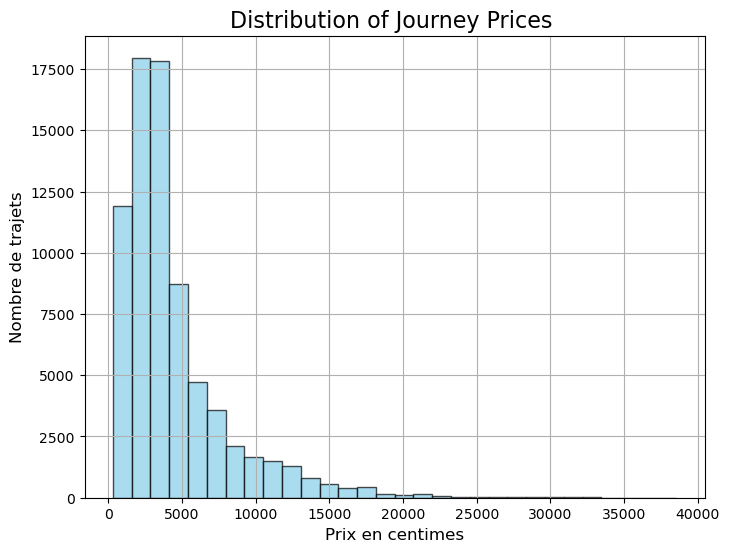

In [75]:

# Create a figure and axis to customize the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Histogram with adjusted bins and color
ax.hist(ticket['price_in_cents'], color='skyblue', edgecolor='black', bins=30, alpha=0.7)

# Title and labels with better font size and style
plt.title('Distribution of Journey Prices ', fontsize=16)
plt.xlabel('Prix en centimes', fontsize=12)
plt.ylabel('Nombre de trajets', fontsize=12)

# Adding grid lines for better readability
ax.grid(True)

# Show plot
plt.show()


Chart showing trip prices, categorized by trip distance and transportation mode.


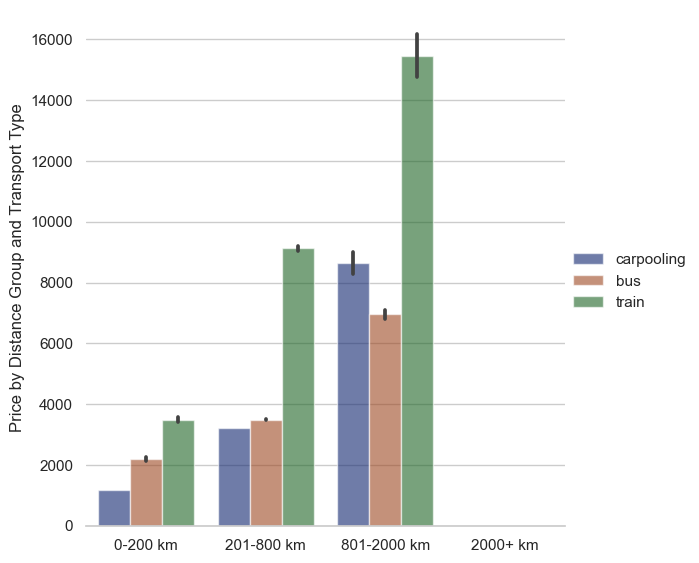

In [76]:
def draw_pricebar(dataframe):
    sns.set_theme(style="whitegrid")
    g = sns.catplot(
        data=dataframe, kind="bar",
        x="distance_category", y="price_in_cents", hue="transport_type",
        palette="dark", alpha=.6, height=6
    )
    g.despine(left=True)
    g.set_axis_labels("", "Price by Distance Group and Transport Type")
    g.legend.set_title("")

draw_pricebar(ticket_copy)



The function visualizes the distribution of trip prices across different distance categories and transport types using a boxplot, allowing for easy comparison and identification of price variations among the different travel scenarios.

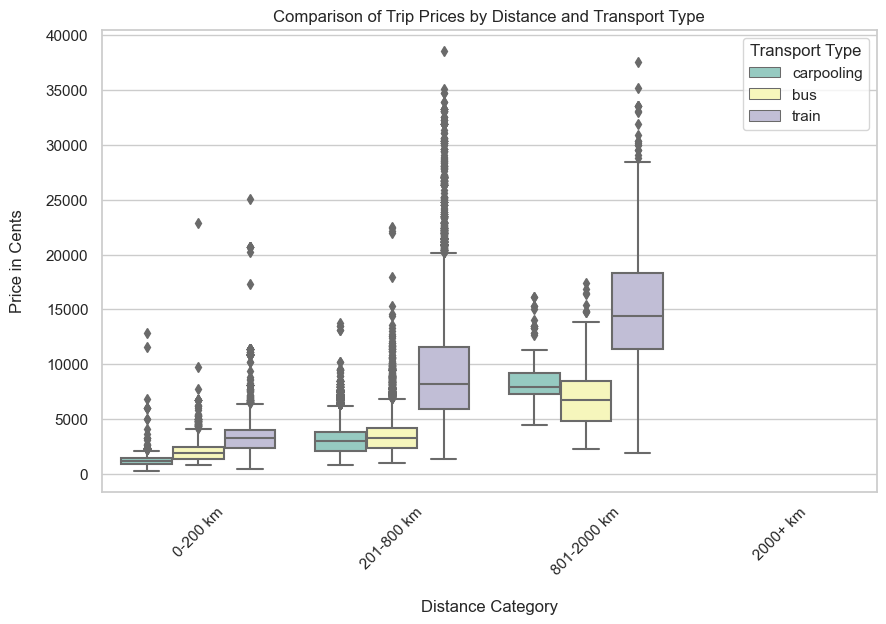

In [77]:
def compare_prices(dataframe):
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    price_comparison = sns.boxplot(
        data=dataframe, 
        x="distance_category", y="price_in_cents", hue="transport_type",
        palette="Set3"
    )
    price_comparison.set_xlabel("Distance Category", labelpad=15)
    price_comparison.set_ylabel("Price in Cents", labelpad=15)
    price_comparison.set_title("Comparison of Trip Prices by Distance and Transport Type")
    price_comparison.legend(title="Transport Type")
    plt.xticks(rotation=45)
    plt.show()

compare_prices(ticket_copy)

### transport types/journeys

The distribution of transport types, average prices, and average durations per transport type based on the provided ticket data.

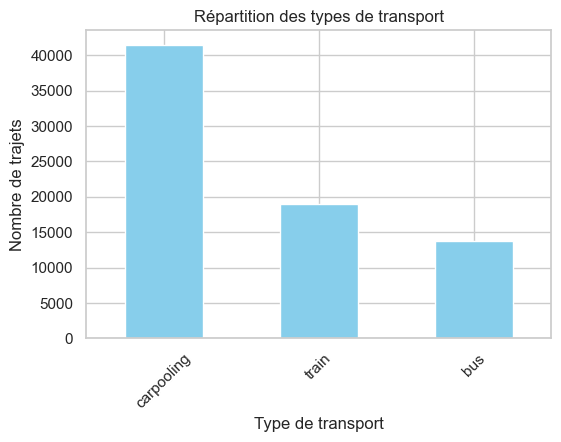

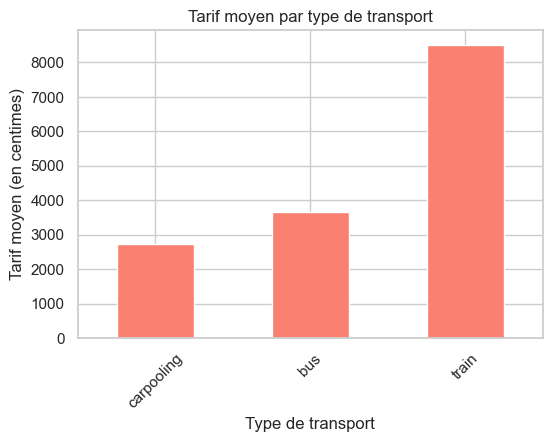

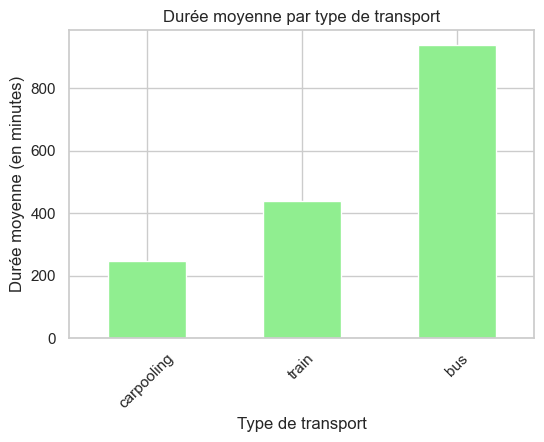

In [78]:
transport_counts = ticket_copy['transport_type'].value_counts()
plt.figure(figsize=(6, 4))
transport_counts.plot(kind='bar', color='skyblue')
plt.title('Répartition des types de transport')
plt.xlabel('Type de transport')
plt.ylabel('Nombre de trajets')
plt.xticks(rotation=45)
plt.show()

# Comparaison des tarifs moyens par type de transport
avg_prices_by_transport = ticket_copy.groupby('transport_type')['price_in_cents'].mean().sort_values()
plt.figure(figsize=(6, 4))
avg_prices_by_transport.plot(kind='bar', color='salmon')
plt.title('Tarif moyen par type de transport')
plt.xlabel('Type de transport')
plt.ylabel('Tarif moyen (en centimes)')
plt.xticks(rotation=45)
plt.show()

# Comparaison de la durée moyenne par type de transport
ticket_copy['duration_minutes'] = ticket_copy['duration'] / 60  # Conversion de la durée en minutes
avg_duration_by_transport = ticket_copy.groupby('transport_type')['duration_minutes'].mean().sort_values()
plt.figure(figsize=(6, 4))
avg_duration_by_transport.plot(kind='bar', color='lightgreen')
plt.title('Durée moyenne par type de transport')
plt.xlabel('Type de transport')
plt.ylabel('Durée moyenne (en minutes)')
plt.xticks(rotation=45)
plt.show()



The function draw_timebar generates a stacked bar chart to represent the duration of trips categorized by distance and transport type

In [79]:
def draw_timebar(dataframe):
    sns.set(style="whitegrid")
    time_bar_plot = sns.barplot(
        data=dataframe, 
        x="distance_category", y="duration", hue="transport_type",
        palette="dark", errorbar=None
    )
    time_bar_plot.set_xlabel("", labelpad=20)  # Remove x-label or set a label if necessary
    time_bar_plot.set_ylabel("Duration by Distance Category and Transport Type", labelpad=20)
    time_bar_plot.set_title("Stacked Bar Chart for Duration by Distance Category and Transport Type")
    time_bar_plot.legend(title="")
    plt.xticks(rotation=45)  # Rotate x-labels for better readability
    plt.show()


calculate statistics on the duration of trips categorized by distance and transport type. Specifically, it computes the mean, maximum, and minimum duration for trips in different categories and transport types, storing each result in its respective DataFrame (vis1, vis2, vis3). Adjustments can be made to further analyze or visualize these statistics as needed.

In [88]:
ticket_copy['all_transport_types'] = ticket_copy['all_transport_types'].apply(str)


In [89]:
# Calculating the mean duration of trips based on distance category and transport type
vis1 = ticket_copy.groupby(['distance_category', 'transport_type'])['duration'].mean()
vis1 = vis1.reset_index()

# Calculating the maximum duration of trips based on distance category and transport type
vis2 = ticket_copy.groupby(['distance_category', 'transport_type'])['duration'].max()
vis2 = vis2.reset_index()

# Calculating the minimum duration of trips based on distance category and transport type
vis3 = ticket_copy.groupby(['distance_category', 'transport_type'])['duration'].min()
vis3 = vis3.reset_index()


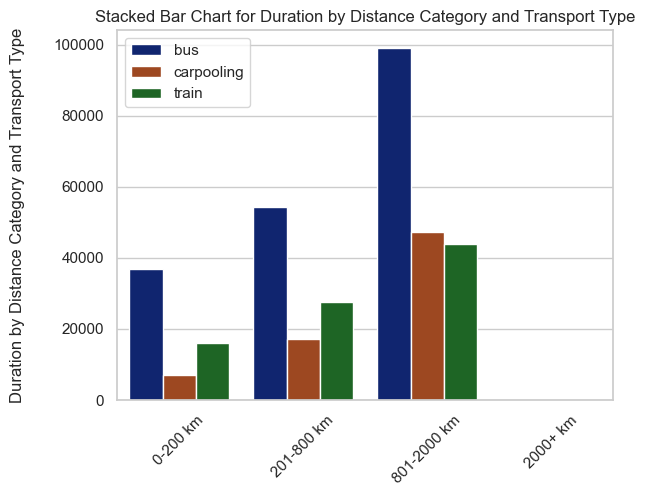

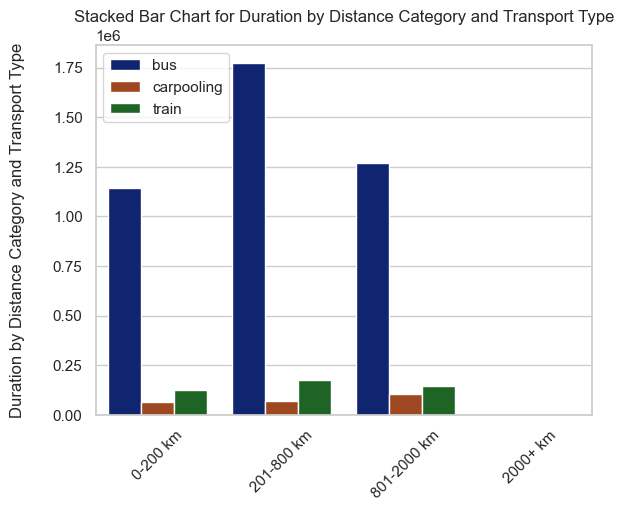

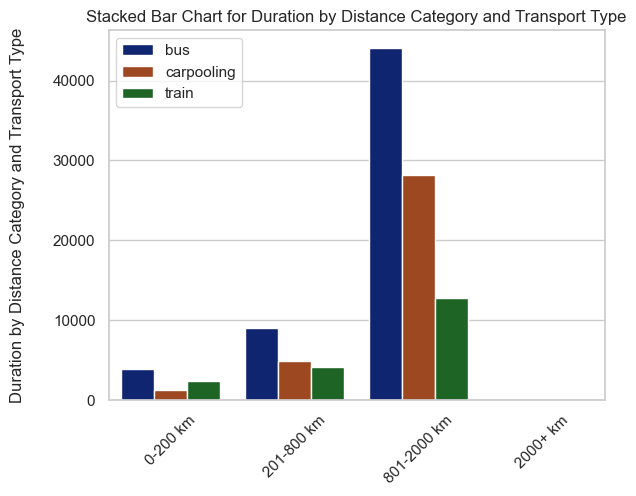

In [90]:
draw_timebar(vis1)
draw_timebar(vis2)
draw_timebar(vis3)


## Prediction

### prepare training set

In [91]:
ticket_copy.columns

Index(['ticket_id', 'company', 'o_station', 'd_station', 'departure_ts',
       'arrival_ts', 'price_in_cents', 'search_ts', 'middle_stations',
       'other_companies', 'o_city', 'd_city', 'duration', 'coor_o_city',
       'coor_d_city', 'dis_city', 'transport_type', 'all_companies',
       'all_transport_types', 'distance_category', 'duration_minutes'],
      dtype='object')

Prepare training set:

- Extract necessary columns from `ticket_copy`.
- One-hot encode 'transport_type'.


In [97]:
ticket_encoded = pd.get_dummies(ticket_copy["transport_type"])
ticket_encoded = pd.concat([ticket_copy, ticket_encoded], axis = 1)

In [98]:
ticket_encoded

,ticket_id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,...,coor_d_city,dis_city,transport_type,all_companies,all_transport_types,distance_category,duration_minutes,bus,carpooling,train
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00:00,2017-10-13 20:10:00+00:00,4550,2017-10-01 00:13:31.327+00,{},{},...,"(43.604452, 3.918318)",503.197167,carpooling,{8385},{'carpooling'},201-800 km,370.0,0,1,0
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00:00,2017-10-14 06:55:00+00:00,1450,2017-10-01 00:13:35.773+00,"{418, 149}",{13},...,"(43.604452, 3.918318)",503.197167,bus,"{9, 13}",{'bus'},201-800 km,1070.0,1,0,0
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 21:24:00+00:00,7400,2017-10-01 00:13:40.212+00,"{6246, 6794, 798}","{8376, 8377}",...,"(43.604452, 3.918318)",503.197167,train,"{8376, 8377}",{'train'},201-800 km,1917.0,0,0,1
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00:00,2017-10-14 11:02:00+00:00,13500,2017-10-01 00:13:40.213+00,"{6246, 6794, 798}","{8376, 8377}",...,"(43.604452, 3.918318)",503.197167,train,"{8376, 8377}",{'train'},201-800 km,1295.0,0,0,1
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00:00,2017-10-14 19:32:00+00:00,7710,2017-10-01 00:13:40.213+00,{5983},{8380},...,"(43.604452, 3.918318)",503.197167,train,"{8380, 8381}",{'train'},201-800 km,1306.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74163,6869182,13,279.0,10729.0,2017-10-27 02:30:00+00:00,2017-10-27 16:00:00+00:00,2590,2017-10-19 10:35:42.943+00,{408},{8371},...,"(47.248785, -1.520898)",338.320135,bus,"{8371, 13}",{'bus'},201-800 km,810.0,1,0,0
74164,6869185,9,279.0,304.0,2017-10-27 07:00:00+00:00,2017-10-27 13:30:00+00:00,2700,2017-10-19 10:35:42.943+00,{1105},{9},...,"(47.248785, -1.520898)",338.320135,bus,{9},{'bus'},201-800 km,390.0,1,0,0
74165,6869187,8371,10642.0,304.0,2017-10-27 08:30:00+00:00,2017-10-27 15:15:00+00:00,3000,2017-10-19 10:35:42.943+00,{1105},{9},...,"(47.248785, -1.520898)",338.320135,bus,"{9, 8371}",{'bus'},201-800 km,405.0,1,0,0
74166,6869189,13,279.0,304.0,2017-10-27 13:25:00+00:00,2017-10-27 21:10:00+00:00,2880,2017-10-19 10:35:42.943+00,{863},{13},...,"(47.248785, -1.520898)",338.320135,bus,{13},{'bus'},201-800 km,465.0,1,0,0


- Create `train_data` containing selected columns: 'price_in_cents', 'duration_minutes', 'dis_city', 'bus', 'carpooling', 'train'.


In [99]:
train_data = ticket_encoded.loc[:,['price_in_cents', 'duration_minutes', 'dis_city', 'bus', 'carpooling', 'train']].copy()


In [100]:
train_data

,price_in_cents,duration_minutes,dis_city,bus,carpooling,train
0,4550,370.0,503.197167,0,1,0
1,1450,1070.0,503.197167,1,0,0
2,7400,1917.0,503.197167,0,0,1
3,13500,1295.0,503.197167,0,0,1
4,7710,1306.0,503.197167,0,0,1
...,...,...,...,...,...,...
74163,2590,810.0,338.320135,1,0,0
74164,2700,390.0,338.320135,1,0,0
74165,3000,405.0,338.320135,1,0,0
74166,2880,465.0,338.320135,1,0,0


### Predicting

Predicting with SVR and Random Forest models:


In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_predict,cross_val_score
from sklearn.preprocessing import LabelEncoder, RobustScaler, StandardScaler

- Train-test split and scaling data.


In [103]:
y = np.array(train_data['price_in_cents'])
X = np.array(train_data.drop('price_in_cents', axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [104]:
y_val = y_test.ravel()
y_train = y_train.ravel()

In [105]:
scaler = StandardScaler()
scaler.fit(X_train)
x_train = scaler.transform(X_train)
x_val = scaler.transform(X_test)

- Train SVR model and assess performance using R-squared score.


In [110]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score

model_SVM = SVR(kernel='linear', C=0.7, epsilon=0.2)

kf = KFold(n_splits=5, shuffle=True)
scores = cross_val_score(model_SVM, x_train, y_train, cv=kf, scoring='r2')
print("SVR R2 score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

model_SVM.fit(x_train, y_train)
y_pred = model_SVM.predict(x_val)

r2 = r2_score(y_test, y_pred)
print(f"SVR R2 score on test data: {r2:.2f}")


SVR R2 score: 0.61 (+/- 0.01)
SVR R2 score on test data: 0.61


- Visualize actual vs. predicted prices using scatter plot for SVR.


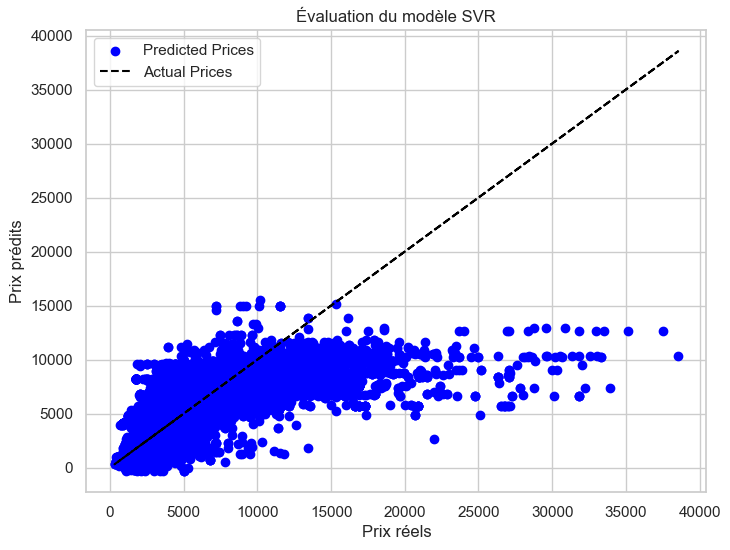

In [112]:
import matplotlib.pyplot as plt

# Plotting actual prices versus predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred, color='blue', label='Predicted Prices')
plt.plot(y_val, y_val, color='black', linestyle='--', label='Actual Prices')

plt.title('Évaluation du modèle SVR')
plt.xlabel('Prix réels')
plt.ylabel('Prix prédits')
plt.legend()
plt.grid(True)
plt.show()


- Train Random Forest model and evaluate its R-squared score on the validation set.


In [113]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Create the Random Forest Regressor model
model_RF = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
model_RF.fit(x_train, y_train)

# Predict on the validation set
y_pred_RF = model_RF.predict(x_val)

# Evaluate the model
r2_RF = r2_score(y_val, y_pred_RF)
print(f"Random Forest R2 score on validation data: {r2_RF:.2f}")


Random Forest R2 score on validation data: 0.92


- Visualize actual vs. predicted prices using scatter plot for Random Forest.


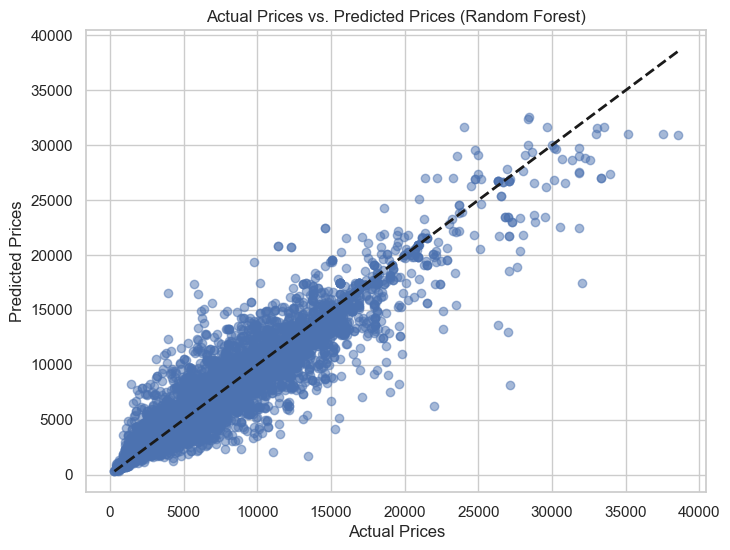

In [114]:
import matplotlib.pyplot as plt

# Create a scatter plot to visualize predicted vs. actual prices
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred_RF, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices (Random Forest)')
plt.show()


- Plot feature importances derived from the Random Forest model.


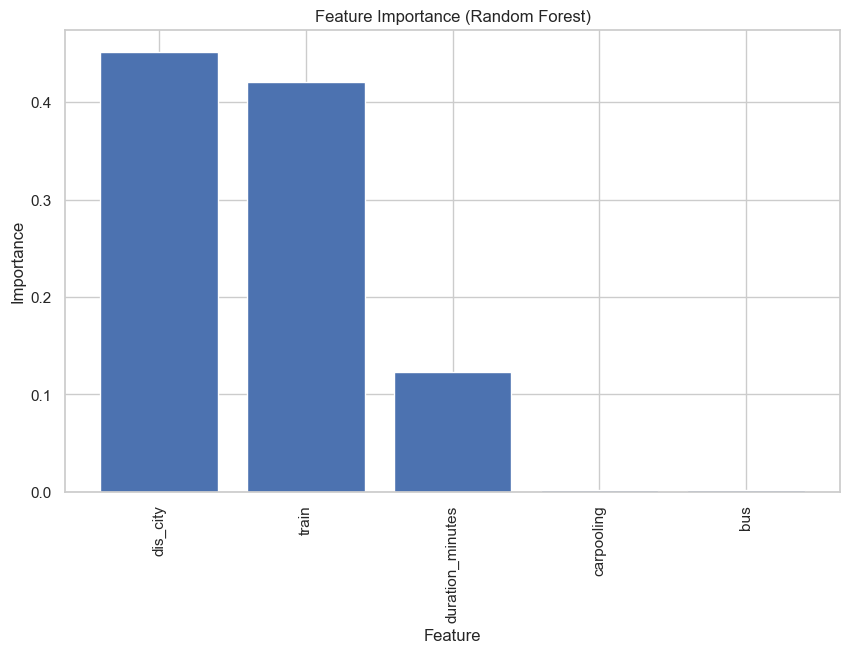

In [115]:
# Extract feature importances from the trained model
feature_importance = model_RF.feature_importances_
feature_names = train_data.drop('price_in_cents', axis=1).columns

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importance)[::-1]

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance[sorted_indices], align='center')
plt.xticks(range(len(feature_importance)), feature_names[sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance (Random Forest)')
plt.show()


Model Tuning with RandomizedSearchCV


- Create a Random Forest Regressor model.
- Define a hyperparameters grid for RandomizedSearchCV.
- Perform RandomizedSearchCV to find the best hyperparameters.
- Train the model with the best parameters obtained from RandomizedSearchCV.
- Evaluate the performance of the best model on the test data.

In [116]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Create Random Forest Regressor model
model_RF = RandomForestRegressor()

# Define hyperparameters grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10, 15],   # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]        # Method for sampling data points
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(model_RF, param_distributions=param_grid, n_iter=10, cv=5, scoring='r2', random_state=42)
random_search.fit(x_train, y_train)

# Get the best parameters found by RandomizedSearchCV
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Train the model using the best parameters
best_model = RandomForestRegressor(**best_params)
best_model.fit(x_train, y_train)

# Evaluate the best model
y_pred_best = best_model.predict(x_val)
r2_best = r2_score(y_test, y_pred_best)
print(f"Best Random Forest R2 score on test data: {r2_best:.2f}")


Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': None, 'bootstrap': True}
Best Random Forest R2 score on test data: 0.91
